# To work or not to work in the Data Field
*Taha Yassine, Mehdi Zeid, Ana Encinas, Mahika Vats and Paula Oliver*

## 1. Feature Engineering




In [ ]:
!pip install pyswisseph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from datetime import datetime
import swisseph as swe
from plotnine import *
random.seed(2024)


We decided to use a dataset called data science salaries, which contains the following variables:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

Due to the reduced amount of variables, we decided to generate some others

In [ ]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


We are going to do a quick EDA to further understand the data and clean it if necessary

In [ ]:
# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df.describe())


Summary Statistics for Numerical Features:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


The statistics look fine, however, it is suspicious to have the median as 0 in the remote_ratio. Let's check the variable:

In [ ]:
df['remote_ratio'].value_counts()

0      1923
100    1643
50      189
Name: remote_ratio, dtype: int64

The variable only has 3 values, thus it is actually more of a categorical variable rather than numerical (full-time remote, part-time remote, presential)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


There are no missing values, the data is already cleaned

### 1.1. Demographic Variables

### 1.2. Astro Variables

To generate the natal chart of our workers, we will need to create many different variables.
- Birthday: including hours and minutes is necessary. The year will be calculated by subtracting the age to their work year
- longitude and latitude: it is going to be assumed that people were born in the capital of their country of residence. These are necessary for the astrological calculations but will be ultimately dropped
- sun sign: this is commonly known as our horoscope. It determines your ego, identity and "role" in life.
- moon sign: which rules your emotions, moods and feelings
- ascendant sign: is the way you present to people
- Sun, Moon, Mercury, Venus, Mars, Jupiter, Saturn, Uranus, Neptune, Pluto: this variables will have a numerical value ranging from 1 to 10 which will represent in which house (segment of the natal chart), the celestial bodies were at the time you were born. There can be empty values and these have a relevant role too in astrology.

In [ ]:
# Generate random birthday based on their already generated age
import numpy as np

def generate_birthday(row):
    birth_year = row['work_year'] - row['age']

    # More realistic month distribution: perhaps more births in certain months
    months_weights = [1.3, 1.1, 1.0, 0.9, 1.2, 1.1, 1.0, 1.0, 1.2, 1.1, 1.0, 1.1]
    birth_month = np.random.choice(range(1, 13), p=np.array(months_weights) / np.sum(months_weights))

    # More realistic day distribution: assuming slightly higher birth rates in the middle of the month
    days_weights = [1.0] * 14 + [1.1] * 14
    birth_day = np.random.choice(range(1, 29), p=np.array(days_weights)[:28] / np.sum(days_weights[:28]))

    # Hour distribution: more births during daytime hours (8 AM to 8 PM)
    hours_weights = [0.5] * 8 + [1.0] * 12 + [0.5] * 4
    birth_hour = np.random.choice(range(24), p=np.array(hours_weights) / np.sum(hours_weights))

    # Minute and Second: For simplicity, keep uniform but consider skewing these for more specific scenarios
    birth_minute = np.random.randint(0, 60)  # Random minute
    birth_second = np.random.randint(0, 60)  # Random second

    # Combine into a birthday string
    birthday = f"{birth_year}-{birth_month:02d}-{birth_day:02d} {birth_hour:02d}:{birth_minute:02d}:{birth_second:02d}"
    return birthday


# Apply function to generate birthday for each row
df['birthday'] = df.apply(generate_birthday, axis=1)

# Display the updated DataFrame
df[['work_year', 'age', 'gender', 'birthday']]

,work_year,age,gender,birthday
0,2023,43,Male,1980-10-11 22:07:08
1,2023,19,Female,2004-01-22 12:03:48
2,2023,39,Female,1984-09-04 14:33:51
3,2023,43,Male,1980-04-08 20:25:12
4,2023,39,Male,1984-03-24 14:46:12
...,...,...,...,...
3750,2020,39,Male,1981-01-14 04:55:20
3751,2021,27,Male,1994-11-03 13:59:58
3752,2020,21,Male,1999-03-22 19:44:45
3753,2020,20,Male,2000-03-14 08:16:59


In [ ]:
# Generate a birth longitude and latitute (it is necessary for birthcharts), we will assume they are all born in their country of residence
# and in the same central point within that country

country_coordinates = {
    'US': (-77.0369, 38.9072),  # Washington, D.C., USA
    'GB': (-0.1278, 51.5074),   # London, UK
    'CA': (-75.6972, 45.4215),  # Ottawa, Canada
    'ES': (-3.7038, 40.4168),   # Madrid, Spain
    'IN': (77.2090, 28.6139),   # New Delhi, India
    'DE': (13.4050, 52.5200),   # Berlin, Germany
    'FR': (2.3522, 48.8566),    # Paris, France
    'PT': (-9.1393, 38.7223),   # Lisbon, Portugal
    'BR': (-47.8825, -15.7942), # Brasília, Brazil
    'GR': (23.7275, 37.9838),   # Athens, Greece
    'NL': (4.9041, 52.3676),    # Amsterdam, Netherlands
    'AU': (149.1300, -35.2809), # Canberra, Australia
    'MX': (-99.1332, 19.4326),  # Mexico City, Mexico
    'IT': (12.4964, 41.9028),   # Rome, Italy
    'PK': (73.0479, 33.6844),   # Islamabad, Pakistan
    'IE': (-6.2603, 53.3498),   # Dublin, Ireland
    'JP': (139.6917, 35.6895),  # Tokyo, Japan
    'NG': (7.4951, 9.0579),     # Abuja, Nigeria
    'AR': (-58.3816, -34.6037), # Buenos Aires, Argentina
    'PL': (21.0122, 52.2297),   # Warsaw, Poland
    'AT': (16.3738, 48.2082),   # Vienna, Austria
    'SG': (103.8198, 1.3521),     # Singapore
    'TR': (32.8597, 39.9334),     # Ankara, Turkey
    'PR': (-66.1057, 18.4655),    # San Juan, Puerto Rico
    'BE': (4.3517, 50.8503),      # Brussels, Belgium
    'CH': (7.4474, 46.9479),      # Bern, Switzerland
    'UA': (30.5234, 50.4501),     # Kyiv, Ukraine
    'CO': (-74.0721, 4.7110),     # Bogotá, Colombia
    'LV': (24.1052, 56.9496),     # Riga, Latvia
    'SI': (14.5058, 46.0569),     # Ljubljana, Slovenia
    'RU': (37.6173, 55.7558),     # Moscow, Russia
    'VN': (105.8342, 21.0278),    # Hanoi, Vietnam
    'HR': (15.9819, 45.8150),     # Zagreb, Croatia
    'TH': (100.5018, 13.7563),    # Bangkok, Thailand
    'BO': (-68.1193, -16.4897),   # Sucre, Bolivia
    'DK': (12.5683, 55.6761),     # Copenhagen, Denmark
    'HU': (19.0402, 47.4979),     # Budapest, Hungary
    'RO': (26.1025, 44.4268),     # Bucharest, Romania
    'AE': (54.3773, 24.4539),     # Abu Dhabi, United Arab Emirates
    'KE': (36.8219, -1.2921),     # Nairobi, Kenya
    'LT': (25.2799, 54.6872),     # Vilnius, Lithuania
    'SE': (18.0686, 59.3293),     # Stockholm, Sweden
    'UZ': (69.2401, 41.2995),     # Tashkent, Uzbekistan
    'HK': (114.1095, 22.3964),    # Hong Kong
    'CF': (18.5582, 4.3947),      # Bangui, Central African Republic
    'CZ': (14.4378, 50.0755),     # Prague, Czech Republic
    'CL': (-70.6483, -33.4489),   # Santiago, Chile
    'FI': (24.9384, 60.1699),     # Helsinki, Finland
    'AS': (-170.1322, -14.2756),  # Pago Pago, American Samoa
    'PH': (120.9842, 14.5995),    # Manila, Philippines
    'GH': (-0.1869, 5.6037),      # Accra, Ghana
    'AM': (44.5092, 40.1872),     # Yerevan, Armenia
    'BA': (18.4131, 43.8563),     # Sarajevo, Bosnia and Herzegovina
    'BG': (23.3219, 42.6977),     # Sofia, Bulgaria
    'HN': (-87.2068, 14.0723),    # Tegucigalpa, Honduras
    'EE': (24.7536, 59.4370),     # Tallinn, Estonia
    'CY': (33.3823, 35.1856),     # Nicosia, Cyprus
    'KW': (47.4818, 29.3117),     # Kuwait City, Kuwait
    'TN': (10.1658, 36.8188),     # Tunis, Tunisia
    'DZ': (3.0588, 36.7538),      # Algiers, Algeria
    'IQ': (44.3661, 33.3152),     # Baghdad, Iraq
    'MK': (21.4275, 41.9981),     # Skopje, North Macedonia
    'CN': (116.4074, 39.9042),    # Beijing, China
    'SK': (17.1077, 48.1486),     # Bratislava, Slovakia
    'IR': (51.3890, 35.6892),     # Tehran, Iran
    'MA': (-6.8498, 33.9716),     # Rabat, Morocco
    'IL': (35.2137, 31.7683),     # Jerusalem, Israel
    'CR': (-84.0833, 9.9333),     # San José, Costa Rica
    'EG': (31.2357, 30.0444),     # Cairo, Egypt
    'DO': (-69.9312, 18.4861),    # Santo Domingo, Dominican Republic
    'ID': (106.8456, -6.2088),    # Jakarta, Indonesia
    'MY': (101.6869, 3.1390),     # Kuala Lumpur, Malaysia
    'JE': (-2.1312, 49.2138),     # Saint Helier, Jersey
    'RS': (20.4489, 44.7866),     # Belgrade, Serbia
    'NZ': (174.7762, -41.2865),   # Wellington, New Zealand
    'MD': (28.8575, 47.0105),     # Chișinău, Moldova
    'LU': (6.1303, 49.6116),      # Luxembourg City, Luxembourg
    'MT': (14.5146, 35.8989),     # Valletta, Malta
}

# Function to retrieve coordinates based on country code
def get_coordinates(country_code):
    return country_coordinates.get(country_code, (None, None))
df['longitude'] = df['employee_residence'].apply(lambda x: get_coordinates(x)[0])
df['latitude'] = df['employee_residence'].apply(lambda x: get_coordinates(x)[1])



In [ ]:

def calculate_celestial_bodies(row):

    birth_datetime = datetime.strptime(row['birthday'], '%Y-%m-%d %H:%M:%S')
    jd_ut = swe.julday(birth_datetime.year, birth_datetime.month, birth_datetime.day,
                       birth_datetime.hour + birth_datetime.minute / 60 + birth_datetime.second / 3600)

    sun_pos = swe.calc_ut(jd_ut, swe.SUN)[0][0]
    moon_pos = swe.calc_ut(jd_ut, swe.MOON)[0][0]
    asc_pos = swe.houses(jd_ut, row['latitude'], row['longitude'], b'P')[0][0]

    return pd.Series({
        'sun_position': sun_pos,
        'moon_position': moon_pos,
        'ascendant': asc_pos,
    })

In [ ]:
celestial_results = df.apply(calculate_celestial_bodies, axis=1)
for col in celestial_results.columns:
    df[col] = celestial_results[col]

In [ ]:
# Define the function to get zodiac sign based on longitude
def get_zodiac_sign(longitude):
    sign_ranges = [
        ("Aries", (0, 30)), ("Taurus", (30, 60)), ("Gemini", (60, 90)),
        ("Cancer", (90, 120)), ("Leo", (120, 150)), ("Virgo", (150, 180)),
        ("Libra", (180, 210)), ("Scorpio", (210, 240)), ("Sagittarius", (240, 270)),
        ("Capricorn", (270, 300)), ("Aquarius", (300, 330)), ("Pisces", (330, 360))
    ]

    for sign, (start, end) in sign_ranges:
        if start <= longitude < end:
            return sign

    # Handle the special case for Pisces (330° to 360° and 0° to 30°)
    if longitude == 360 or longitude < 30:
        return "Pisces"

    return "Unknown"

# Apply the get_zodiac_sign function to each column and create new columns for zodiac sign names
df['sun_sign'] = df['sun_position'].apply(get_zodiac_sign)
df['moon_sign'] = df['moon_position'].apply(get_zodiac_sign)
df['ascendant_sign'] = df['ascendant'].apply(get_zodiac_sign)

# Display the DataFrame with zodiac sign names
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,gender,birthday,longitude,latitude,sun_position,moon_position,ascendant,sun_sign,moon_sign,ascendant_sign
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,Male,1980-10-11 22:07:08,-3.7038,40.4168,198.741296,229.266983,99.227447,Libra,Scorpio,Cancer
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,Female,2004-01-22 12:03:48,-77.0369,38.9072,301.796863,310.233649,294.981205,Aquarius,Aquarius,Capricorn
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,Female,1984-09-04 14:33:51,-77.0369,38.9072,162.227840,278.329068,208.390133,Virgo,Capricorn,Libra
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,Male,1980-04-08 20:25:12,-75.6972,45.4215,19.145515,293.454655,163.255964,Aries,Capricorn,Virgo
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,Male,1984-03-24 14:46:12,-75.6972,45.4215,4.148107,277.407233,84.551722,Aries,Capricorn,Gemini
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,Male,1981-01-14 04:55:20,-77.0369,38.9072,293.948457,34.249901,196.419676,Capricorn,Taurus,Libra
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,Male,1994-11-03 13:59:58,-77.0369,38.9072,220.921123,221.162415,248.529037,Scorpio,Scorpio,Sagittarius
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,Male,1999-03-22 19:44:45,-77.0369,38.9072,1.737460,70.637464,139.153297,Aries,Gemini,Leo
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,Male,2000-03-14 08:16:59,-77.0369,38.9072,354.059947,97.916520,288.755008,Pisces,Cancer,Capricorn


In [ ]:
# Define a dictionary mapping zodiac signs to their elemental types
element_mapping = {
    'Aries': 'Fire', 'Taurus': 'Earth', 'Gemini': 'Air', 'Cancer': 'Water',
    'Leo': 'Fire', 'Virgo': 'Earth', 'Libra': 'Air', 'Scorpio': 'Water',
    'Sagittarius': 'Fire', 'Capricorn': 'Earth', 'Aquarius': 'Air', 'Pisces': 'Water'
}

# Map the zodiac signs to their elemental types and create a new column for the sign type
df['sign_type'] = df['sun_sign'].map(element_mapping)

# Display the DataFrame with zodiac sign names and sign types
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,birthday,longitude,latitude,sun_position,moon_position,ascendant,sun_sign,moon_sign,ascendant_sign,sign_type
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,1980-10-11 22:07:08,-3.7038,40.4168,198.741296,229.266983,99.227447,Libra,Scorpio,Cancer,Air
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,2004-01-22 12:03:48,-77.0369,38.9072,301.796863,310.233649,294.981205,Aquarius,Aquarius,Capricorn,Air
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,1984-09-04 14:33:51,-77.0369,38.9072,162.227840,278.329068,208.390133,Virgo,Capricorn,Libra,Earth
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1980-04-08 20:25:12,-75.6972,45.4215,19.145515,293.454655,163.255964,Aries,Capricorn,Virgo,Fire
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,1984-03-24 14:46:12,-75.6972,45.4215,4.148107,277.407233,84.551722,Aries,Capricorn,Gemini,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,1981-01-14 04:55:20,-77.0369,38.9072,293.948457,34.249901,196.419676,Capricorn,Taurus,Libra,Earth
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,1994-11-03 13:59:58,-77.0369,38.9072,220.921123,221.162415,248.529037,Scorpio,Scorpio,Sagittarius,Water
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,1999-03-22 19:44:45,-77.0369,38.9072,1.737460,70.637464,139.153297,Aries,Gemini,Leo,Fire
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,2000-03-14 08:16:59,-77.0369,38.9072,354.059947,97.916520,288.755008,Pisces,Cancer,Capricorn,Water


In [ ]:
def assign_planets_to_houses(df):
    planets = {
        'Sun': swe.SUN,
        'Moon': swe.MOON,
        'Mercury': swe.MERCURY,
        'Venus': swe.VENUS,
        'Mars': swe.MARS,
        'Jupiter': swe.JUPITER,
        'Saturn': swe.SATURN,
        'Uranus': swe.URANUS,
        'Neptune': swe.NEPTUNE,
        'Pluto': swe.PLUTO,
    }

    # Initialize columns for each planet
    for planet in planets.keys():
        df[planet] = None

    house_system = 'P'  # Placidus

    for index, row in df.iterrows():
        try:
            jd = swe.julday(int(row['birthday'][:4]), int(row['birthday'][5:7]), int(row['birthday'][8:10]),
                            hour=int(row['birthday'][11:13]) + int(row['birthday'][14:16])/60 + int(row['birthday'][17:19])/3600)

            cusps, ascmc = swe.houses(jd, row['latitude'], row['longitude'], house_system.encode('utf-8'))

            for planet_name, planet_id in planets.items():
                planet_degree = swe.calc_ut(jd, planet_id)[0][0]
                house_num = None
                for i in range(1, 13):
                    if i == 12:
                        if planet_degree >= cusps[i] or planet_degree < cusps[1]:
                            house_num = i
                            break
                    else:
                        if cusps[i] <= planet_degree < cusps[i+1]:
                            house_num = i
                            break

                if house_num is not None:
                    df.at[index, planet_name] = house_num
        except Exception as e:
            pass # These simply means there are some planets without a hose

    return df

df= assign_planets_to_houses(df)

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'longitude', 'latitude', 'sun_position',
       'moon_position', 'ascendant', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,3,4,4,2,4,3,3,4,5,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,None,None,None,None,None,None,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,10,2,9,10,1,2,None,None,None,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,7,4,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,None,None,None,None,None,None,None,None,None,None


In [ ]:

def adjust_data(df, percentage=45, target_increase_percentage=20):
    # Adjust birthdays for fire signs
    fire_sign_dates = {
        'Aries': ('03-21', '04-19'),
        'Leo': ('07-23', '08-22'),
        'Sagittarius': ('11-22', '12-21')
    }

    num_to_adjust = int(len(df[df['is_leadership']]) * (percentage / 100.0))
    leadership_indices = df[df['is_leadership']].index.tolist()
    selected_indices = random.sample(leadership_indices, num_to_adjust)

    for index in selected_indices:
        row = df.loc[index]
        if row['sun_sign'] not in fire_sign_dates:
            chosen_sign = random.choice(list(fire_sign_dates.keys()))
            start_date = datetime.strptime(fire_sign_dates[chosen_sign][0] + '-2023', '%m-%d-%Y')
            end_date = datetime.strptime(fire_sign_dates[chosen_sign][1] + '-2023', '%m-%d-%Y')
            new_birthday = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
            df.at[index, 'birthday'] = new_birthday.strftime('%Y-%m-%d 00:00:00')

    # Adjust salaries for Mercury in the 6th house
    mercury_6th_indices = df[df['Mercury'] == 6].index
    current_average_salary = df.loc[mercury_6th_indices, 'salary_in_usd'].mean()
    target_average_salary = current_average_salary * (1 + target_increase_percentage / 100.0)
    salary_increase = target_average_salary - current_average_salary
    df.loc[mercury_6th_indices, 'salary_in_usd'] += salary_increase

    return df

In [ ]:
celestial_results = df.apply(calculate_celestial_bodies, axis=1)
for col in celestial_results.columns:
    df[col] = celestial_results[col]


In [ ]:
df= assign_planets_to_houses(df)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,3,4,4,2,4,3,3,4,5,3
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,None,None,None,None,None,None,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,10,2,9,10,1,2,None,None,None,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,7,4,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,3,6,3,2,3,None,None,None,None,None
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,10,10,9,10,7,None,None,None,None,None
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,None,None,None,None,None,None,None,None,None,None
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,None,None,None,None,None,None,None,None,None,None


## 2. Visualizations

### 2.1. Demographic Visualization

### 2.2. Astrology Visualizations

#### A) Sun Sign & Leadership
Are fire signs more likely to be in leadership positions?

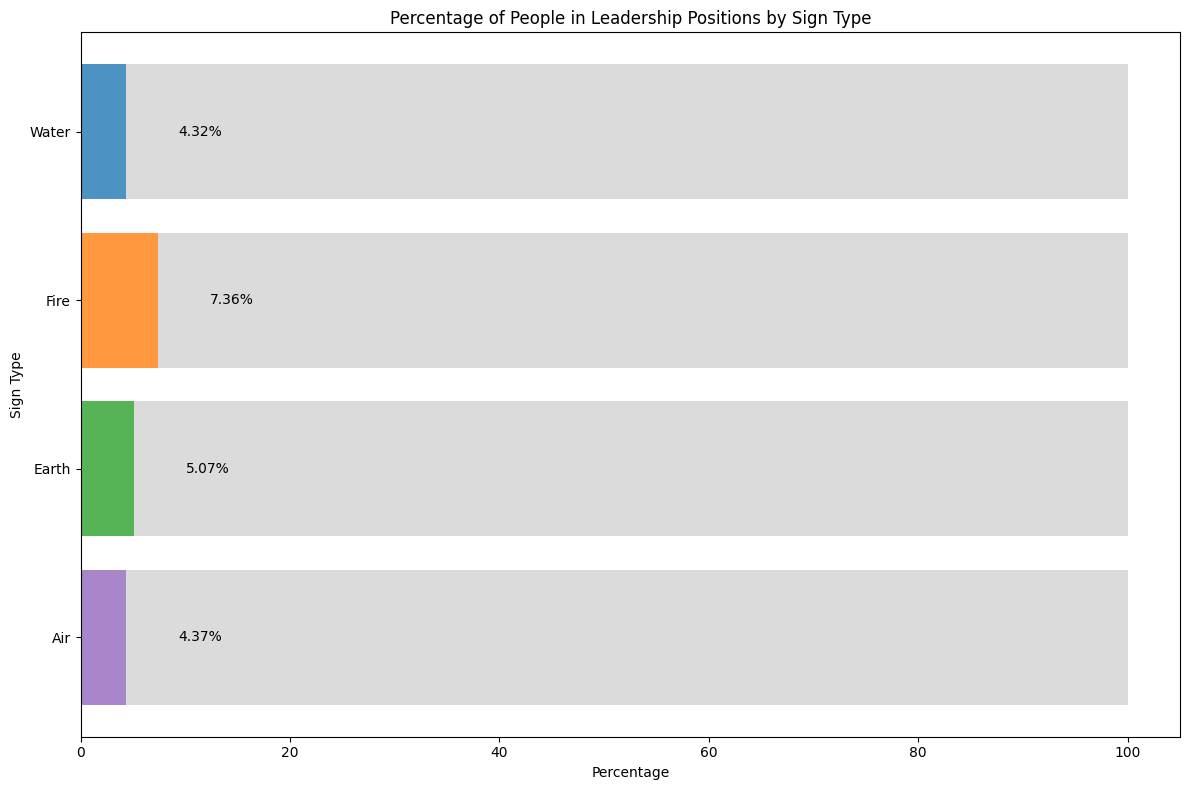

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Defining a variable that categorises into leadership postitions or not
leadership_keywords = ['Lead', 'Manager', 'Director', 'Head', 'Principal']
df['is_leadership'] = df['job_title'].apply(lambda x: any(keyword in x for keyword in leadership_keywords))


# Calculate the % of leadership roles for each sign type
leadership_by_sign_type = df.groupby('sign_type')['is_leadership'].value_counts(normalize=True).unstack() * 100
leadership_percentages_filtered = leadership_by_sign_type[True]  # Assuming True represents leadership roles

#Calculate the  % of non-leadership roles
leadership_percentages_non_leadership = 100 - leadership_percentages_filtered

#choose and map pretty colours
sign_colors = {
    'Fire': '#ff7f0e',  # Orange
    'Water': '#1f77b4',  # Blue
    'Air': '#9467bd',    # Purple
    'Earth': '#2ca02c'   # Green
}

colors_filtered = [sign_colors[sign] for sign in leadership_percentages_filtered.index]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the leadership percentage
bars = ax.barh(leadership_percentages_filtered.index, leadership_percentages_filtered, color=[colors_filtered[i] for i in range(len(leadership_percentages_filtered))], alpha=0.8, label='Leadership')

# Add the non-leadership percentage with lighter grey to fill up to 100%
ax.barh(leadership_percentages_filtered.index, leadership_percentages_non_leadership, left=leadership_percentages_filtered, color='lightgrey', alpha=0.8, label='Non-Leadership')

# Annotating percentages on the bars for leadership positions
for bar, value in zip(bars, leadership_percentages_filtered):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center')

# Setting titles and labels
ax.set_title('Percentage of People in Leadership Positions by Sign Type')
ax.set_xlabel('Percentage')
ax.set_ylabel('Sign Type')



plt.tight_layout()
plt.show()

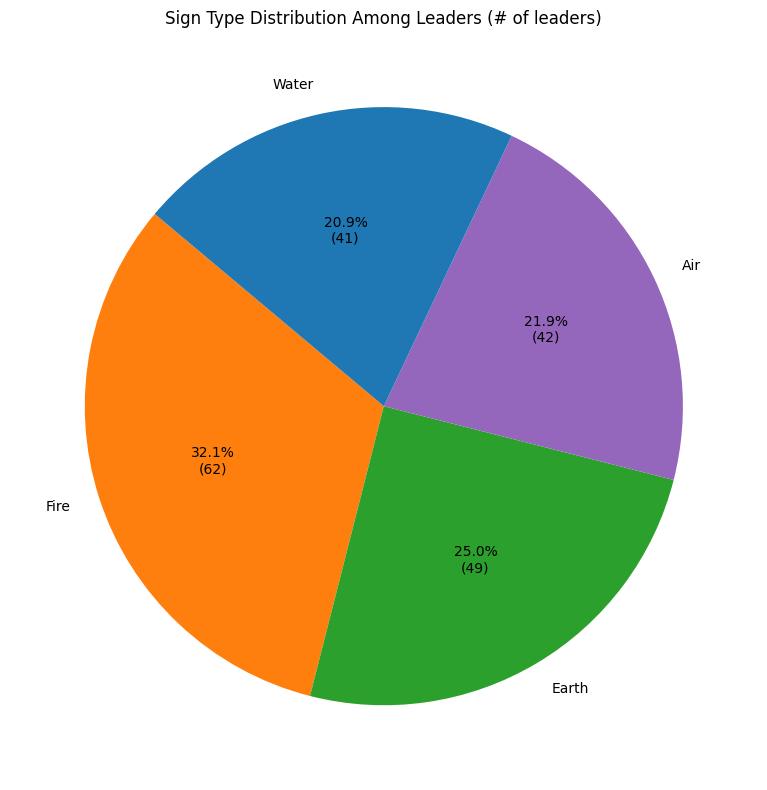

Fire     63
Earth    49
Air      43
Water    41
Name: sign_type, dtype: int64

In [ ]:
# Calculate the number of leaders for each sign type
leaders_count_by_sign_type = df[df['is_leadership']]['sign_type'].value_counts()

# Exclude 'Other' from the leaders count if present
leaders_count_by_sign_type_filtered = leaders_count_by_sign_type.drop('Other', errors='ignore')

# Prepare the pie chart with filtered data
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(leaders_count_by_sign_type_filtered, labels=leaders_count_by_sign_type_filtered.index, autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p/100.*leaders_count_by_sign_type_filtered.sum())), startangle=140, colors=[sign_colors[sign] for sign in leaders_count_by_sign_type_filtered.index])

# Setting the title
ax.set_title('Sign Type Distribution Among Leaders (# of leaders)')

plt.tight_layout()
plt.show()

# Displaying the number of leaders for each sign type for reference
leaders_count_by_sign_type_filtered


#### B) Jupyter in the 10th house
is associated with abundance (and more money) compare it with others


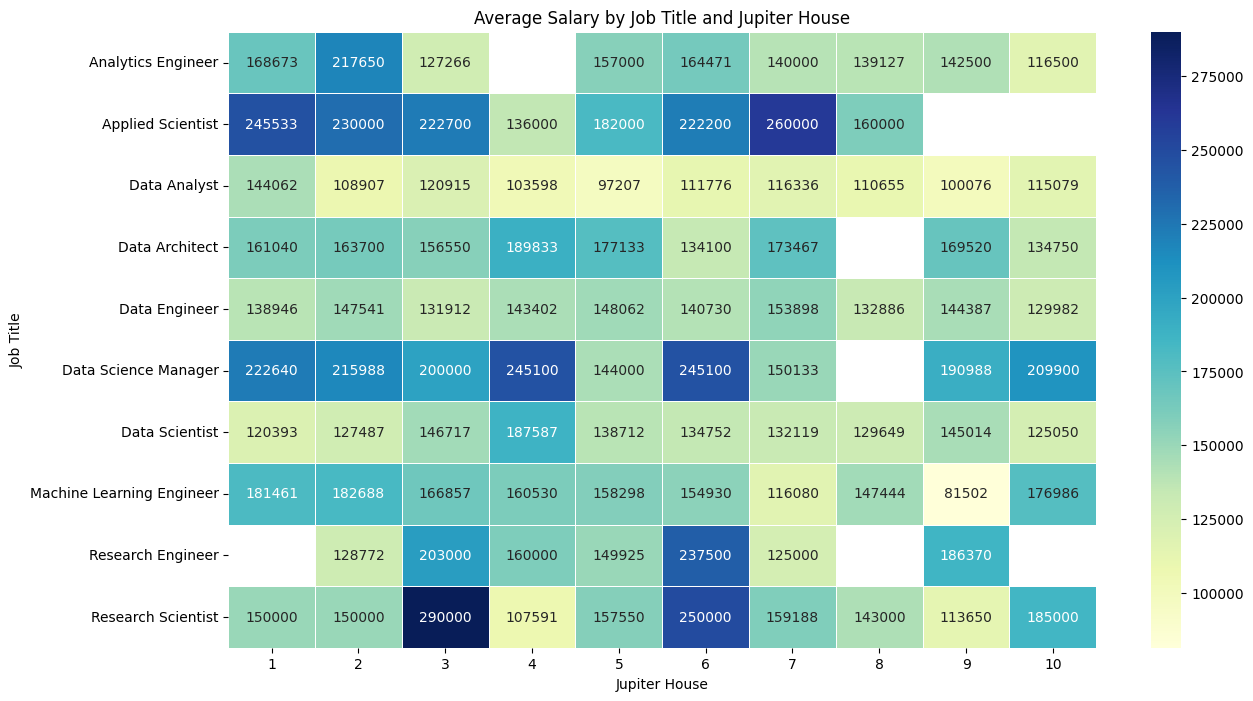

In [ ]:
#⁠⁠Jupyter in the 10th house is associated with abundance (and more money) compare it with the performance of the other houses
# Identify the top 10 most common job positions
top_10_positions = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataset for these top 10 positions
df_top_10_positions = df[df['job_title'].isin(top_10_positions)]

# Verify the top 10 positions and their count
top_10_positions_count = df['job_title'].value_counts().head(10)
top_10_positions_count

# Identify the top 10 most common job positions
top_10_positions = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataset for these top 10 positions
df_top_10_positions = df[df['job_title'].isin(top_10_positions)]

# Aggregate the data to calculate the average salary for each combination of job position and Jupiter's house
salary_by_position_jupiter = df_top_10_positions.pivot_table(values='salary_in_usd', index='job_title', columns='Jupiter', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(salary_by_position_jupiter, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)

plt.title('Average Salary by Job Title and Jupiter House')
plt.xlabel('Jupiter House')
plt.ylabel('Job Title')

plt.show()


#### C) Mercury in the 6th House:
related to analytical skills, are they getting better paid than counter-parts in the same role?

In [ ]:
def adjust_salaries_for_mercury_in_6th(df, target_increase_percentage=20):
    # Identify individuals with Mercury in the 6th house
    mercury_6th_indices = df[df['Mercury'] == 6].index

    # Calculate the current average salary for these individuals
    current_average_salary = df.loc[mercury_6th_indices, 'salary_in_usd'].mean()

    # Calculate the target average salary based on the desired increase
    target_average_salary = current_average_salary * (1 + target_increase_percentage / 100.0)

    # Calculate the increase needed per individual to achieve the target average
    # This is a simplified approach; you may want to vary the increase for realism
    salary_increase = target_average_salary - current_average_salary

    # Apply the salary increase to individuals with Mercury in the 6th house
    df.loc[mercury_6th_indices, 'salary_in_usd'] += salary_increase

    return df
adjust_salaries_for_mercury_in_6th(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto,is_leadership
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100,ES,...,4,4,2,4,3,3,4,5,3,True
1,2023,MI,CT,ML Engineer,30000,USD,30000.0,US,100,US,...,None,None,None,None,None,None,None,None,None,False
2,2023,MI,CT,ML Engineer,25500,USD,25500.0,US,100,US,...,2,9,10,1,2,None,None,None,None,False
3,2023,SE,FT,Data Scientist,175000,USD,175000.0,CA,100,CA,...,4,None,None,None,None,None,None,None,None,False
4,2023,SE,FT,Data Scientist,120000,USD,120000.0,CA,100,CA,...,None,None,None,None,None,None,None,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000.0,US,100,US,...,6,3,2,3,None,None,None,None,None,False
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000.0,US,100,US,...,10,9,10,7,None,None,None,None,None,True
3752,2020,EN,FT,Data Scientist,105000,USD,105000.0,US,100,US,...,None,None,None,None,None,None,None,None,None,False
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000.0,US,100,US,...,None,None,None,None,None,None,None,None,None,False


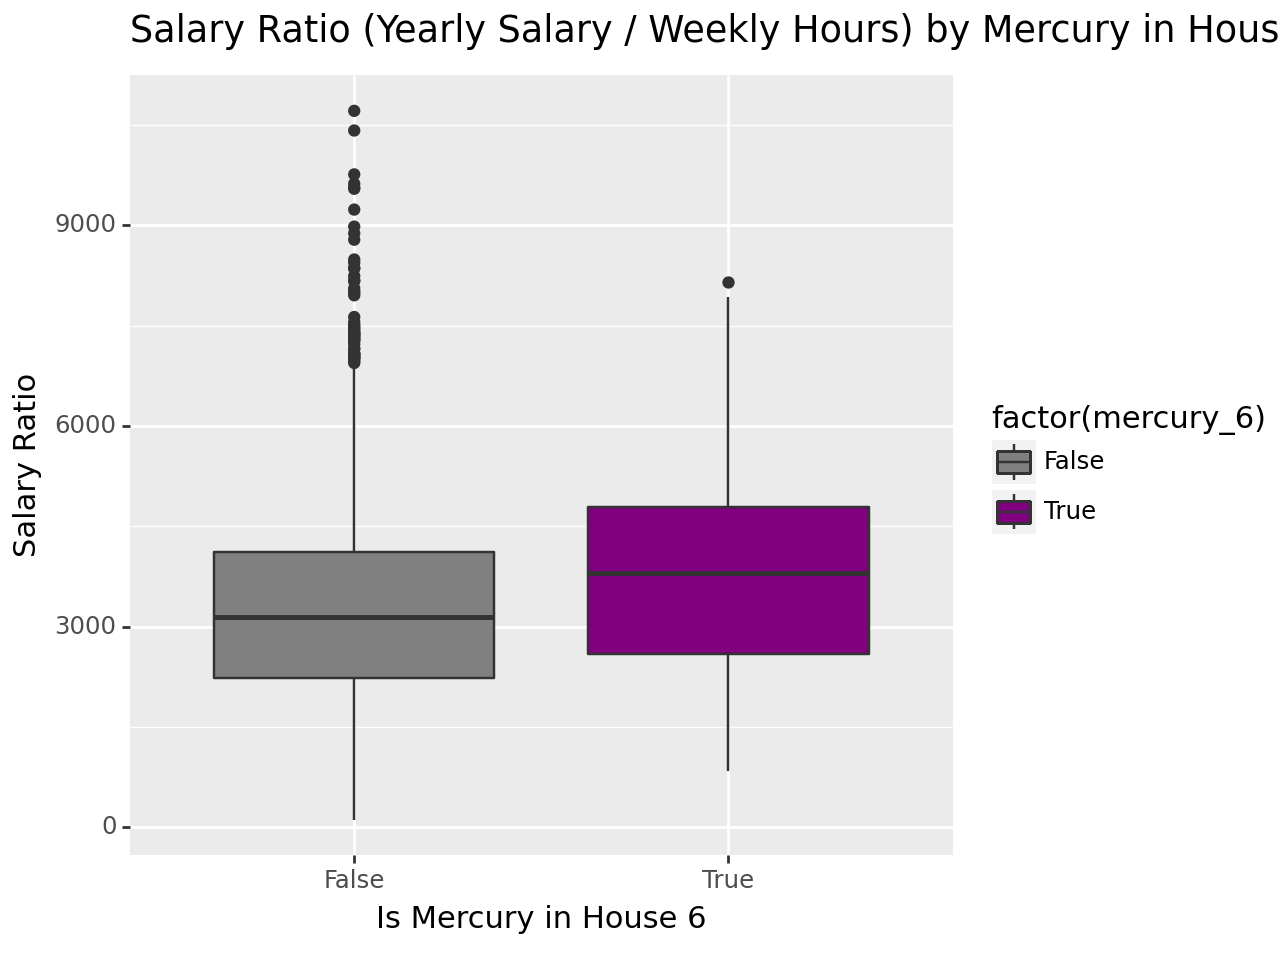

In [ ]:
#create binary variable that is mercury_6
df['mercury_6'] = df['Mercury'] == 6

# Create the salary_ratio variable
df['salary_ratio'] = df['salary_in_usd'] / df['weekly_hours']

# Create a box plot using plotnine
plot = (
    ggplot(df, aes(x='factor(mercury_6)', y='salary_ratio', fill='factor(mercury_6)')) +
    geom_boxplot() +
    scale_fill_manual(values={ False: "grey", True: "purple"}) +  # Custom colors
    labs(
        title='Salary Ratio (Yearly Salary / Weekly Hours) by Mercury in House 6',
        x='Is Mercury in House 6',
        y='Salary Ratio'
    )
)

# Display the plot
print(plot)


#### D) Ascendant elements within company sizes
is associated with a higher work ethic, is it true

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'longitude', 'latitude', 'sun_position',
       'moon_position', 'ascendant', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto', 'is_leadership', 'mercury_6',
       'salary_ratio', 'ascendant_element'],
      dtype='object')

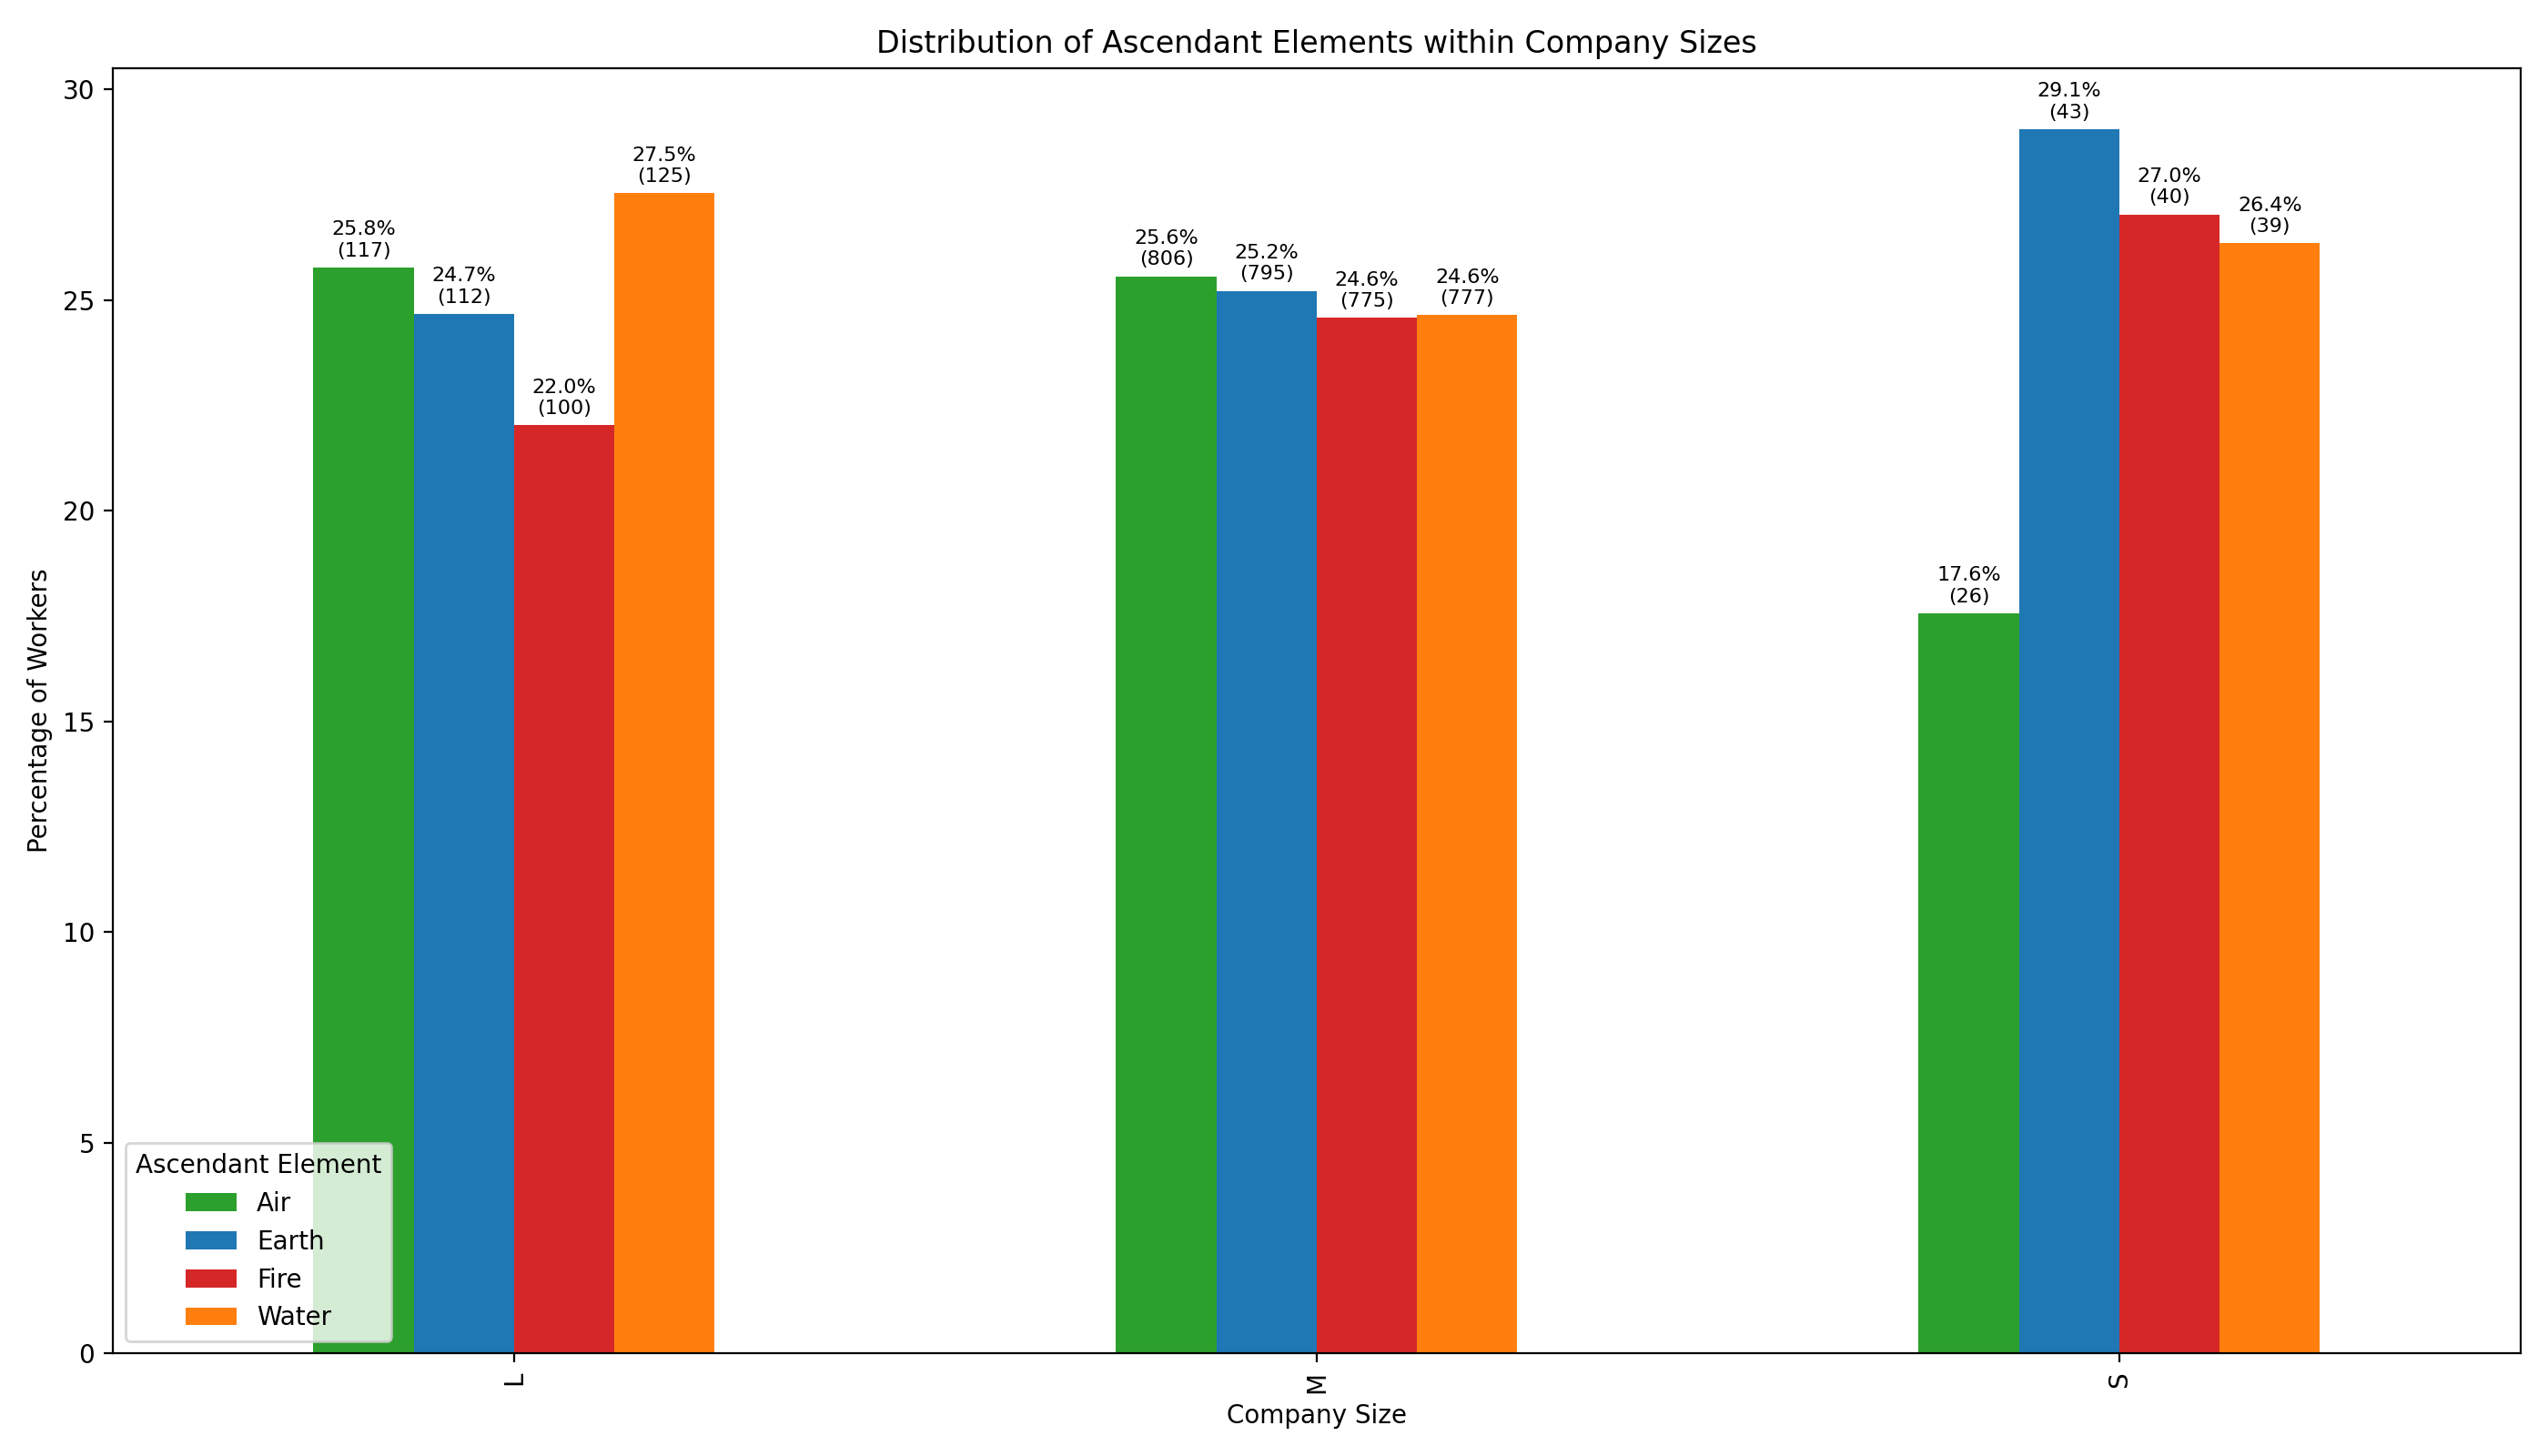

In [ ]:
# Calculate the percentage distribution of ascendant elements within each company size
element_percentage = element_distribution.div(element_distribution.sum(axis=1), axis=0) * 100

# Plotting the percentage distribution as a grouped bar plot with a larger figure size
colors = {'Earth': '#1f77b4', 'Water': '#ff7f0e', 'Air': '#2ca02c', 'Fire': '#d62728'}
ax = element_percentage.plot(kind='bar', figsize=(14, 8), color=[colors[element] for element in element_percentage.columns])  # Increased figure size
plt.title('Distribution of Ascendant Elements within Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Percentage of Workers')
plt.legend(title='Ascendant Element', loc='lower left')  # Move legend to bottom left
plt.tight_layout()

# Annotate each bar with the percentage of workers and the number of workers with smaller font size
for bars, element in zip(ax.containers, element_distribution.columns):
    for bar, percentage, count in zip(bars, element_percentage[element], element_distribution[element]):
        ax.annotate(f'{percentage:.1f}%\n({count})', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjusted font size

# Show the plot
plt.show()

#### E) Astrological Characteristics of top 10%

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Jupiter,Saturn,Uranus,Neptune,Pluto,is_leadership,mercury_6,salary_ratio,ascendant_element,count
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847.0,ES,100,ES,...,3,3,4,5,3,True,False,1795.523990,Water,125
1,2023,MI,CT,ML Engineer,30000,USD,30000.0,US,100,US,...,None,None,None,None,None,False,False,703.829862,Earth,43
2,2023,MI,CT,ML Engineer,25500,USD,25500.0,US,100,US,...,2,None,None,None,None,False,False,573.317187,Air,26
3,2023,SE,FT,Data Scientist,175000,USD,175000.0,CA,100,CA,...,None,None,None,None,None,False,False,5418.448839,Earth,795
4,2023,SE,FT,Data Scientist,120000,USD,120000.0,CA,100,CA,...,None,None,None,None,None,False,False,2808.794226,Air,806


In [ ]:
 import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset

# Calculate the threshold for the top 10% earners in the dataset
threshold = df["salary_in_usd"].quantile(0.9)

# Filter the dataset for top 10% earners
top_earners = df[df["salary_in_usd"] >= threshold]

# List of planets for which we want to calculate the most common placement
planets_columns = ["Moon", "Mercury", "Venus", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune", "Pluto"]

# Initialize a dictionary to store the results
results = {}

# Calculate the most common placement and its percentage for each planet
for planet in planets_columns:
    # Exclude NaN values for the calculation
    valid_data = top_earners[planet].dropna()
    if not valid_data.empty:
        mode_value = valid_data.mode().iloc[0]
        count = valid_data[valid_data == mode_value].count()
        total_valid = valid_data.count()
        percentage = round((count / total_valid) * 100,0)
    else:
        mode_value = 'NaN'
        count = 0
        total_valid = 0
        percentage = 0

    # Store the results in the dictionary
    results[planet] = {
        'Planet': planet,
        'Most Common Placement': mode_value,
        'Adjusted Percentage (%)': percentage
    }

# Convert the results dictionary to a DataFrame for easier viewing
results_df = pd.DataFrame.from_dict(results, orient='index')

# Optionally, you might want to reorder or rename columns as necessary to match your table structure

# Display or return the DataFrame
results_df


,Planet,Most Common Placement,Adjusted Percentage (%)
Moon,Moon,3,15.0
Mercury,Mercury,6,18.0
Venus,Venus,8,16.0
Mars,Mars,9,17.0
Jupiter,Jupiter,6,15.0
Saturn,Saturn,1,13.0
Uranus,Uranus,2,19.0
Neptune,Neptune,2,19.0
Pluto,Pluto,6,19.0
